In [1]:
#Install Pre-Req
!pip install easyocr;

In [2]:
#Import das Libs
from matplotlib import pyplot as plot
from PIL import Image

import matplotlib as mpl
import numpy as np
import easyocr
import math
import cv2
import re

In [3]:
#Realiza-se o Upload da Imagem para o Google Colab.
path = 'img (1).bmp'
img = cv2.imread(path)

In [4]:
#Cria-se uma Cópia da Imagem para a Apresentação dos Resultados
original = img

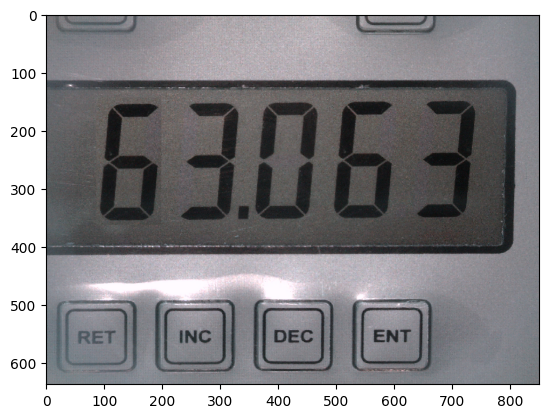

In [5]:
#Visualização da Imagem
plot.imshow(img,cmap='gray')
plot.show()

In [6]:
#Recorte da Região de Interesse
x, y, w, h = 65, 135, 685, 230
img = img[y:y+h, x:x+w]

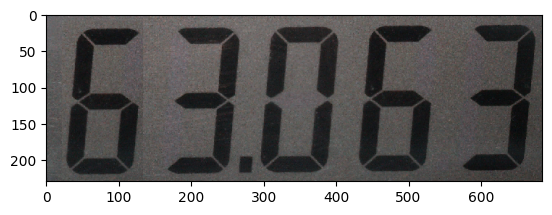

In [7]:
#Visualização da Imagem após Recorte
plot.imshow(img,cmap='gray')
plot.show()

In [8]:
#Aplica-se a Normalização para Melhorar a Resolução da Imagem (Utilizou-se MinMax)
norm_img = np.zeros((img.shape[0], img.shape[1]))
img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

In [9]:
#Destacando as Cores Escuras da Imagem
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,2))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel,iterations=1)

In [10]:
#Aplicaçao do filtro de Mediana
img = cv2.medianBlur(img,(7))

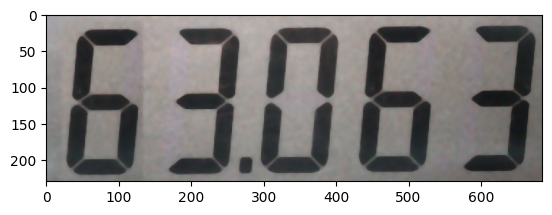

In [11]:
#Exibição do Resultado da Aplicação da Mediana
plot.imshow(img,cmap='gray')
plot.show()

In [12]:
#Inicialmente, converte-se a imagem colorida para Escalas de Cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
#Ajuste Fino do Limiar para a Tarefa de Limiarização
if path == 'img (8).BMP':
  T = 45
elif path == 'img (10).BMP':
  T = 73
elif path == 'img (12).BMP':
  T = 40
elif path == 'img (13).BMP':
  T = 6
elif path == 'img (18).BMP':
  T = 88
else:
  T = 85

In [14]:
#Aplicação da limiarização com o OpenCV (Ajuste Fino)
T ,img_bin = cv2.threshold(img_gray, T, 255, cv2.THRESH_BINARY)

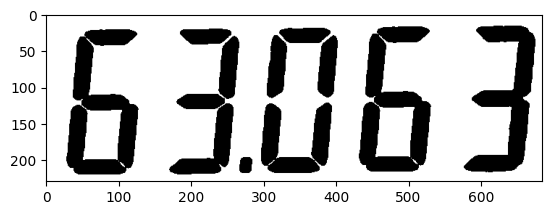

In [15]:
#Visuaização da Imagem Binarizada
plot.imshow(img_bin,cmap='gray')
plot.show()

In [16]:
#Em seguida, cria um EE de 4x4 com 1's
EE = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))

In [17]:
#Aplicação do Operador da Erosão
if path == 'img (13).BMP':
  img_final = cv2.erode(img_bin,EE,iterations = 11)
else:
  img_final = cv2.erode(img_bin,EE,iterations = 5)

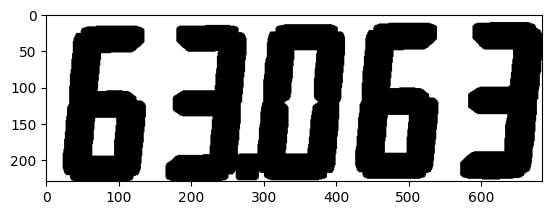

In [18]:
#Visualização da Imagem pós-Erosão
plot.imshow(img_final,cmap='gray')
plot.show()

In [19]:
#Reader Definition for EasyOCR
reader = easyocr.Reader(['en', 'pt']);
text = ""

if path == 'img (18).BMP':
  text = text + str(reader.readtext(img_bin, detail = 0, allowlist='0123456789', paragraph = True));
else:
  text = text + str(reader.readtext(img_final, detail = 0, allowlist='0123456789', paragraph = True));

In [20]:
#Remove-se os Caracteres Especiais e Mantén-se Somente os Numeros
text = re.findall(r'\d+', text)
text = ''.join(text)

Digitos Contidos na Imagem: 6 3 0 6 3


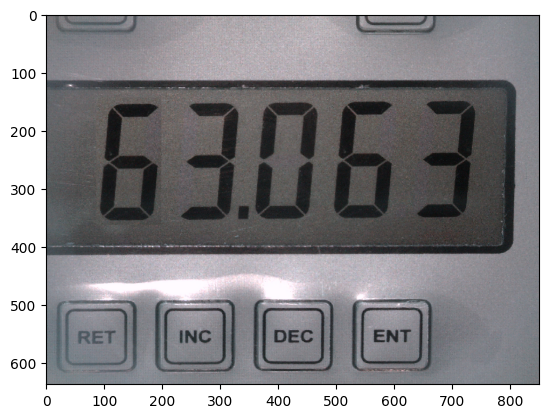

In [21]:
#Visualização da Imagem + Resultados
print("Digitos Contidos na Imagem: " + text[0], text[1], text[2], text[3], text[4])

plot.imshow(original,cmap='gray')
plot.show()